# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройте файл с данными и изучите общую информацию

### Подключение библиотек и файлов:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

### Изучение датасета:

Выведем первые 20 строчек датафрейма data на экран:

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода info():

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму для всех столбцов таблицы:

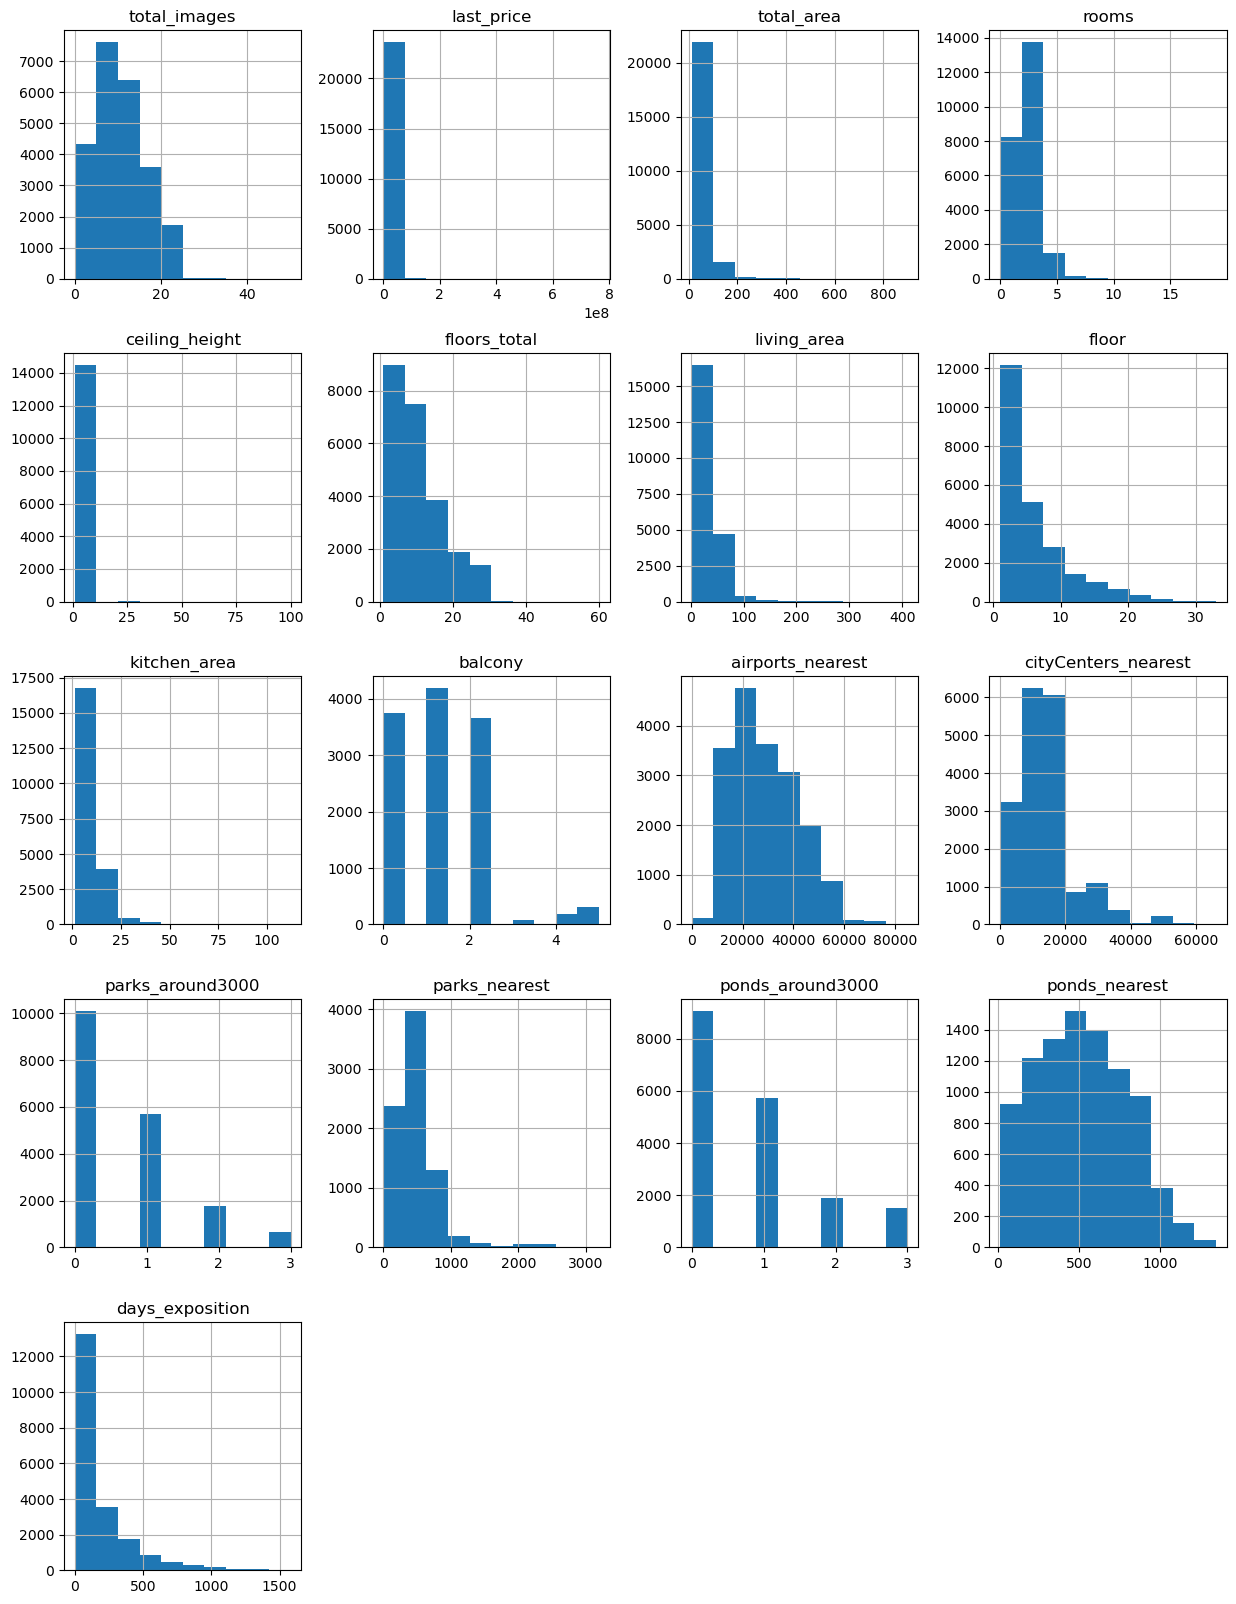

In [4]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:**

Видно ошибки в типах данных и пропуски в таблицах.

## Выполните предобработку данных

### Изучение пропусков:

Найдем и изучим пропущенные значения в столбцах:

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Из результатов видно, что пропуски имеются в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

Построим температурный график по количеству пропусков:

In [6]:
pd.DataFrame(data.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})

,Пропуски
ceiling_height,39%
floors_total,0%
living_area,8%
is_apartment,88%
kitchen_area,10%
balcony,49%
locality_name,0%
airports_nearest,23%
cityCenters_nearest,23%
parks_around3000,23%


Изучим подробнее состав данных в столбце is_apartment:

In [7]:
data['is_apartment'].value_counts(dropna=False)

is_apartment
NaN      20924
False     2725
True        50
Name: count, dtype: int64

Возможные причины появления пропусков в исходных данных: Проанализировав строки с пропусками, могу предположить, что пропуски в столбце is_apartment связанны с тем, что данная недвижимость не является апартаментами, такие пропуски можно заменить на False.

Изучим подробнее состав данных в столбце balcony:

In [8]:
data['balcony'].value_counts(dropna=False)

balcony
NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: count, dtype: int64

Возможные причины появления пропусков в исходных данных: Пропуски в графе balcony, вероятно, связаны с тем, что в данных объектах недвижимости нет балконов, их можно заменить нулями. 

Существенное число пропусков в обеих таблицах говорит о том, что они неслучайны и могли возникнуть по причине неполного заполнения данных пользователями, или при неправильном объеденении таблиц.

### Замена пропусков:

Заменим пропуски в столбцах is_apartment и balcony:

In [121]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts(dropna=False)

is_apartment
False    23515
True        50
Name: count, dtype: int64

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts(dropna=False)

balcony
0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: count, dtype: int64

Заменим пропуски в столбце living_area, произведениями известных величин общей площади на коэффициенты долей жилой площади в общей в зависимости от количества комнат:

In [11]:
data.query('living_area > 0.9 * total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
1854,3,6540000.0,60.20,2018-10-14T00:00:00,2,NaN,24.0,55.00,24,False,...,14.84,0.0,Санкт-Петербург,33606.0,14769.0,0.0,NaN,0.0,NaN,60.0
1992,5,4000000.0,37.40,2018-02-11T00:00:00,1,2.53,16.0,36.40,10,False,...,8.60,1.0,Санкт-Петербург,19979.0,21690.0,0.0,NaN,1.0,1052.0,74.0
2950,5,3050000.0,35.00,2017-09-26T00:00:00,2,NaN,5.0,33.00,3,False,...,8.50,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2959,9,2550000.0,32.00,2017-12-02T00:00:00,1,NaN,14.0,30.20,13,False,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,157.0
3891,4,2600000.0,70.40,2017-07-29T00:00:00,3,2.50,5.0,68.10,5,False,...,9.00,3.0,Любань,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.00,1,True,...,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0
6802,15,7500000.0,69.00,2017-02-15T00:00:00,2,4.50,3.0,64.00,3,False,...,25.00,0.0,Санкт-Петербург,40326.0,15610.0,0.0,NaN,2.0,852.0,427.0
7398,6,6297880.0,83.66,2018-10-23T00:00:00,3,NaN,3.0,77.00,2,False,...,12.39,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0


In [12]:
data['living_area'] = data['living_area'].fillna(data['total_area'] *
                                                 (data.groupby('rooms')['living_area'].transform('median') /
                                                 data.groupby('rooms')['total_area'].transform('median')))

Проверим отсутствие пропусков:

In [13]:
data['living_area'].isna().sum()

0

Заполним пропуски в столбце kitchen_area:

Рассчитаем недостающие площади кухонь из условия, что сумма площади кухни и жилой площади не должна превышать 0,9 от общей площади total_area * 0.9 >= (living_area + kitchen_area):

In [14]:
data['kitchen_area_from_condition'] = data['total_area'] * 0.9 - data['living_area']
data.loc[data['kitchen_area_from_condition'] < 0, 'kitchen_area_from_condition'] =  0
data['kitchen_area_from_condition'].describe()

count    23699.000000
mean        19.679950
std         12.836160
min          0.000000
25%         12.850503
50%         17.037736
75%         22.530000
max        400.300000
Name: kitchen_area_from_condition, dtype: float64

Рассчитаем недостающие площади кухонь как произведения известных величин общей площади на коэффициент доли площади кухни в общей площади:

In [15]:
data['kitchen_area_from_ratio'] = data['kitchen_area'].fillna(data['total_area'] * 
                                                 (data['kitchen_area'].median() / data['total_area'].median()))

Заполним пропуски в этом столбце минимальными значениями из них:

In [16]:
data['kitchen_area'] = data[['kitchen_area_from_condition','kitchen_area_from_ratio']].min(axis=1)

Проверим отсутствие пропусков:

In [17]:
data['kitchen_area'].isna().sum()

0

Проверим выполнение условия суммы площадей:

In [18]:
len(data.query('total_area * 0.9 < (living_area + kitchen_area)'))

34

Пропуски в столбце 'locality_name' и floors_total составляют малую часть данных, и их можно отбросить:

In [19]:
data = data.dropna(subset = ['locality_name', 'floors_total'])

Логичную замену в осталных столбцах предложить не могу, поэтому на данном этапе оставим эти значения пустыми. Посмотрим на оставшееся количество пропусков:

In [20]:
data.isna().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                  9084
floors_total                       0
living_area                        0
floor                              0
is_apartment                       0
studio                             0
open_plan                          0
kitchen_area                       0
balcony                            0
locality_name                      0
airports_nearest                5524
cityCenters_nearest             5501
parks_around3000                5500
parks_nearest                  15535
ponds_around3000                5500
ponds_nearest                  14529
days_exposition                 3171
kitchen_area_from_condition        0
kitchen_area_from_ratio            0
dtype: int64

### Типы данных в каждом столбце:

Найдем столбцы, в которых нужно изменить тип данных:

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_images                 23565 non-null  int64  
 1   last_price                   23565 non-null  float64
 2   total_area                   23565 non-null  float64
 3   first_day_exposition         23565 non-null  object 
 4   rooms                        23565 non-null  int64  
 5   ceiling_height               14481 non-null  float64
 6   floors_total                 23565 non-null  float64
 7   living_area                  23565 non-null  float64
 8   floor                        23565 non-null  int64  
 9   is_apartment                 23565 non-null  bool   
 10  studio                       23565 non-null  bool   
 11  open_plan                    23565 non-null  bool   
 12  kitchen_area                 23565 non-null  float64
 13  balcony              

In [22]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_from_condition,kitchen_area_from_ratio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,46.200000,25.000
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,17.760000,11.000
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,16.100000,8.300
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,98.013699,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,45.086301,27.825
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,58.000000,41.000


Очевидно, что данные в столбце first_day_exposition должны иметь тип datetime64, т.к. это дата и правильный формат может пригодиться для дальнейших вычислений, а в столбцах floors_total, balcony, parks_around3000, ponds_around3000, days_exposition - int64, т.к. это всегда целые числа. Данные столбца last_price также логично заменить на тип int64, т.к. цены на объекты недвижимости всегда являются целыми числами.

Выполним соответствующие преобразования:

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

In [24]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 23565 non-null  int64         
 1   last_price                   23565 non-null  int32         
 2   total_area                   23565 non-null  float64       
 3   first_day_exposition         23565 non-null  datetime64[ns]
 4   rooms                        23565 non-null  int64         
 5   ceiling_height               14481 non-null  float64       
 6   floors_total                 23565 non-null  int32         
 7   living_area                  23565 non-null  float64       
 8   floor                        23565 non-null  int64         
 9   is_apartment                 23565 non-null  bool          
 10  studio                       23565 non-null  bool          
 11  open_plan                    23565 non-null  b

Типы данных в столбцах parks_around3000 и ponds_around3000 оставили без изменений, т.к. в этих данных присутствует большое количество пропусков, которые нельзя заменить логическими значениями и удалить также нельзя ввиду их числа.

### Поиск и удаление дубликатов

Проверим данные на наличие явных дубликатов:

In [26]:
data.duplicated().sum()

0

Явных дубликатов на данном этапе не обнаружено.

Изучим уникальные значения в столбце locality_name с названиями населенных пунктов:

In [27]:
data.locality_name.sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [28]:
len(data.locality_name.sort_values().unique())

364

В списке уникальных значений обнаружены повторы из-за разного написания типов населенных пунктов, например, 'городской поселок Янино-1' = 'городской посёлок Янино-1' и 'поселок городского типа имени Свердлова' = 'посёлок городского типа имени Свердлова'. Помимо этого есть повторы, когда один и тот же населенный пункт указан без типа и с типом, напимер Кудрово и деревня Кудрово.

Устранить разные написани типов поселок и посёлок можно, заменив во всех словах ё на е , но при этом все равно останутся повторы типа Кудрово и деревня Кудрово. Поэтому для устранения повторов в столбце locality_name избавимся от типов населенных пунктов, оставив только их названия:

In [29]:
data.locality_name = data.locality_name.apply(
    lambda title: ' '.join(word for word in title.split(' ') if not(word.islower()))
)

Вновь изучим уникальные значения в столбце locality_name:

In [30]:
data.locality_name.sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [31]:
len(data.locality_name.sort_values().unique())

305

Вместо прежних 364 наименований стало 305, избавились от 59 повторов.

Вновь проверим данные на наличие явных дубликатов:

In [32]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

### Редкие и выбивающиеся значения

**Проанализируем столбец last_price на наличие выбросов:**

Определим самые частые и экстремальные значения в столбце. Предварительно для визуально удобного отображения цен изменим формат отображения вещественных чисел:

In [33]:
pd.set_option('display.float_format', lambda x: '%.1f'%x)
data.last_price.describe()

count       23565.0
mean      6540058.3
std      10910934.7
min         12190.0
25%       3400000.0
50%       4646000.0
75%       6790000.0
max     763000000.0
Name: last_price, dtype: float64

Построим диаграмму размаха для этого столбца

<Axes: >

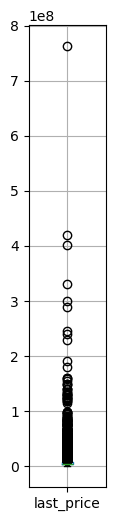

In [34]:
data.boxplot(column='last_price', grid=True, figsize=(1, 6))

Выведем альтернативный график, чтобы увидеть диапазон нормальных значений (без выбросов).

<Axes: >

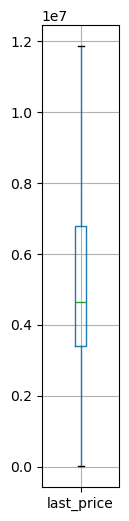

In [35]:
data.boxplot(column='last_price', showfliers=False, grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 100 млн являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [36]:
good_data = data.query('last_price <= 100000000').reset_index(drop=True)

**Проанализируем столбец total_area на наличие выбросов:**

Определим самые частые и экстремальные значения в столбце:

In [37]:
good_data.total_area.describe()

count   23528.0
mean       59.9
std        33.5
min        12.0
25%        40.0
50%        52.0
75%        69.5
max       590.0
Name: total_area, dtype: float64

Построим диаграмму размаха для этого столбца

<Axes: >

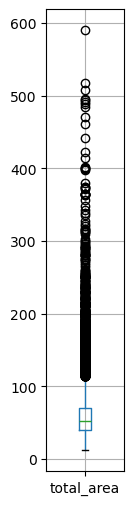

In [38]:
good_data.boxplot(column='total_area', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 400 кв.м. являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [39]:
good_data = data.query('total_area <= 400').reset_index(drop=True)

**Проанализируем столбец rooms на наличие выбросов:**

Определим самые частые и экстремальные значения в столбце:

In [40]:
good_data.rooms.describe()

count   23542.0
mean        2.1
std         1.1
min         0.0
25%         1.0
50%         2.0
75%         3.0
max        19.0
Name: rooms, dtype: float64

Построим диаграмму размаха для этого столбца

<Axes: >

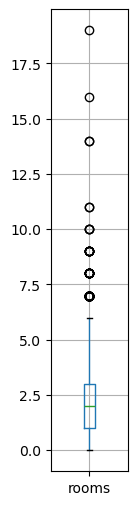

In [41]:
good_data.boxplot(column='rooms', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 11 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [42]:
good_data = good_data.query('rooms <= 11').reset_index(drop=True)

 **Проанализируем столбец ceiling_height:**

Определим самые частые и экстремальные значения в столбце:

In [43]:
good_data.ceiling_height.describe()

count   14463.0
mean        2.8
std         1.3
min         1.0
25%         2.5
50%         2.6
75%         2.8
max       100.0
Name: ceiling_height, dtype: float64

Построим диаграмму размаха для этого столбца

<Axes: >

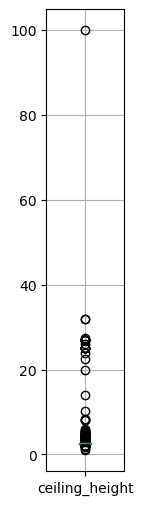

In [44]:
good_data.boxplot(column='ceiling_height', grid=True, figsize=(1, 6))

Значения высоты полотка более 40 м являются выбросом, и их можно отбросить. Сформируем новый набор данных, исключив эти значения, и построим новую диаграмму размаха:

In [45]:
good_data = good_data.query('ceiling_height < 40 | ceiling_height.isna()').reset_index(drop=True)

<Axes: >

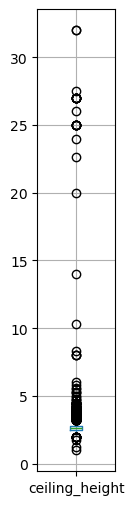

In [46]:
good_data.boxplot(column='ceiling_height', grid=True, figsize=(1, 6))

Из диаграммы видно наличие аномалии в диапазоне высот 20-35 м. Вероятно, здесь пропущена точка в вещественных числах. Исправим эти значения:

In [47]:
def fix_the_ceil(old_ceiling_height):
    if 20 <= old_ceiling_height <= 40:
        return old_ceiling_height / 10
    return old_ceiling_height

In [48]:
good_data.ceiling_height = good_data.ceiling_height.apply(fix_the_ceil).reset_index(drop=True)

Снова построим диаграмму размаха:

<Axes: >

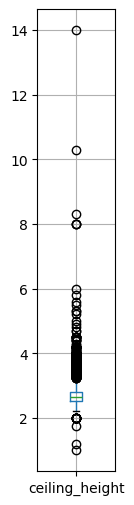

In [49]:
good_data.boxplot(column='ceiling_height', grid=True, figsize=(1, 6))

Значения высоты полотка менее 2 м и более 6 м являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [50]:
good_data = good_data.query('(ceiling_height > 2 & ceiling_height < 6) | ceiling_height.isna()'
                           ).reset_index(drop=True)

Теперь можем заполнить оставшиеся пропуски в столбце ceiling_height медианным значением высоты потолков:

In [51]:
good_data.ceiling_height = good_data.ceiling_height.fillna(good_data.ceiling_height.median())
good_data.ceiling_height.isna().sum()

0

**Проанализируем столбец floors_total:**

Проверим, есть ли явные аномальные значения количества этажей (нулевые, отрицательные значения, либо меньшие, чем количество этажей в доме):

In [52]:
len(good_data[good_data['floors_total'] <= 0])

0

In [53]:
len(good_data[good_data['floor'] > good_data['floors_total']])

0

Явные аномалии отсутствуют. Определим самые частые и экстремальные значения в столбце:

In [54]:
good_data.floors_total.describe()

count   23515.0
mean       10.7
std         6.6
min         1.0
25%         5.0
50%         9.0
75%        16.0
max        60.0
Name: floors_total, dtype: float64

Построим диаграмму размаха для этого столбца, чтобы определить самые частые и экстремальные значения в столбце:

<Axes: >

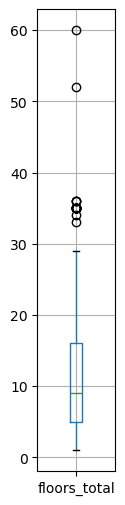

In [55]:
good_data.boxplot(column='floors_total', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 40 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [56]:
good_data = good_data.query('floors_total <= 40').reset_index(drop=True)

**Проанализируем столбец floor:**

Определим самые частые и экстремальные значения в столбце:

In [57]:
good_data.floor.describe()

count   23513.0
mean        5.9
std         4.9
min         1.0
25%         2.0
50%         4.0
75%         8.0
max        33.0
Name: floor, dtype: float64

Построим диаграмму размаха для этого столбца

<Axes: >

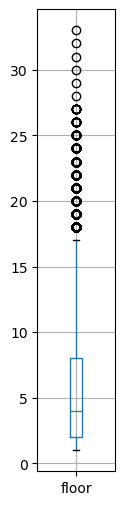

In [58]:
good_data.boxplot(column='floor', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 30 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [59]:
good_data = good_data.rename(columns = {'floor': 'floors'})

In [60]:
good_data = good_data.query('floors <= 30').reset_index(drop=True)

**Проанализируем столбец living_area:**

Проверим, есть ли явные аномальные значения жилой площади (отрицательные значения, либо большие, чем общая площадь продаваемого объекта недвижимости):

In [61]:
len(good_data[good_data['living_area'] < 0])

0

In [62]:
len(good_data[good_data['living_area'] > good_data['total_area']])

0

Явные аномалии отсутствуют. Определим самые частые и экстремальные значения в столбце:

In [63]:
good_data.living_area.describe()

count   23510.0
mean       34.4
std        21.1
min         2.0
25%        18.7
50%        30.0
75%        42.2
max       271.0
Name: living_area, dtype: float64

Построим диаграмму размаха для этого столбца, чтобы определить самые частые и экстремальные значения в столбце:

<Axes: >

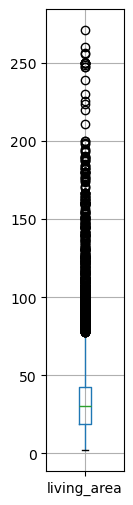

In [64]:
good_data.boxplot(column='living_area', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 200 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [65]:
good_data = good_data.query('living_area <= 200').reset_index(drop=True)

**Проанализируем столбец kitchen_area:**

Проверим, есть ли явные аномальные значения площади кухни (отрицательные значения, либо большие, чем общая площадь продаваемого объекта недвижимости):

In [66]:
len(good_data[good_data['kitchen_area'] < 0])

0

In [67]:
len(good_data[good_data['kitchen_area'] > good_data['total_area']])

0

Явные аномалии отсутствуют. Определим самые частые и экстремальные значения в столбце:

In [68]:
good_data.kitchen_area.describe()

count   23491.0
mean       10.3
std         5.7
min         0.0
25%         7.0
50%         9.0
75%        11.9
max       107.0
Name: kitchen_area, dtype: float64

Построим диаграмму размаха для этого столбца, чтобы определить самые частые и экстремальные значения в столбце:

<Axes: >

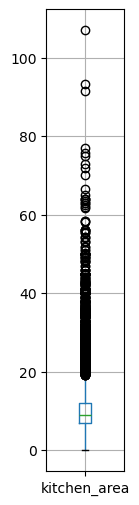

In [69]:
good_data.boxplot(column='kitchen_area', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 80 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [70]:
good_data = good_data.query('kitchen_area <= 80').reset_index(drop=True)

**В остальных столбцах по первичным диаграммам всё близко к нормальному, поэтому анализ этих столбцов на аномалии не требуется.**

## Добавьте в таблицу новые столбцы

### **Цена одного квадратного метра:**

In [71]:
good_data['price_for_meter'] = round((good_data.last_price / good_data.total_area), 2)
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floors,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_from_condition,kitchen_area_from_ratio,price_for_meter
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,46.2,25.0,120370.4
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,17.8,11.0,82920.8
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,16.1,8.3,92785.7
3,0,64900000,159.0,2015-07-24,3,2.6,14,98.0,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,45.1,27.8,408176.1
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,58.0,41.0,100000.0
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,13.0,9.1,95065.8
6,6,3700000,37.3,2017-11-02,1,2.6,26,10.6,6,False,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,23.0,14.4,99195.7
7,5,7915000,71.6,2019-04-18,2,2.6,24,41.2,22,False,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,23.2,18.9,110544.7
8,20,2900000,33.2,2018-05-23,1,2.6,27,15.4,26,False,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,14.4,8.8,87454.8
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,False,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,11.3,6.5,88524.6


### **День недели публикации объявления:**

In [72]:
good_data['exposition_weekday'] = good_data.first_day_exposition.dt.weekday

### **Месяц публикации объявления:**

Для анализа месяцев публикации объявлений (в целом по всем годам) создадим столбец exposition_month:

In [73]:
good_data['exposition_month'] = good_data.first_day_exposition.dt.month
good_data['exposition_month'].head()

0     3
1    12
2     8
3     7
4     6
Name: exposition_month, dtype: int32

Для анализа месяцев в каждом конкретном году создадим столбец exposition_month_of_the_year:

In [74]:
good_data['exposition_month_of_the_year'] = good_data.first_day_exposition.astype('datetime64[M]', errors="ignore")
good_data['exposition_month_of_the_year'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: exposition_month_of_the_year, dtype: datetime64[ns]

### **Год публикации объявления:**

In [75]:
good_data['exposition_year'] = good_data.first_day_exposition.dt.year

### **Тип этажа квартиры:**

In [76]:
def get_floor_type(row):
    if row['floors'] == 1:
        return "первый"
    elif row['floors'] == row['floors_total']:
        return "последний"
    else:
        return "другой"

In [77]:
good_data['floor_type'] = good_data.apply(get_floor_type, axis=1)

### **Расстояние до центра города в километрах:**

In [78]:
good_data['km_to_city_center'] = round(good_data.cityCenters_nearest / 1000)

## Проведите исследовательский анализ данных

**Изучим параметры объектов недвижимости:**

**Данные по общей площади:**

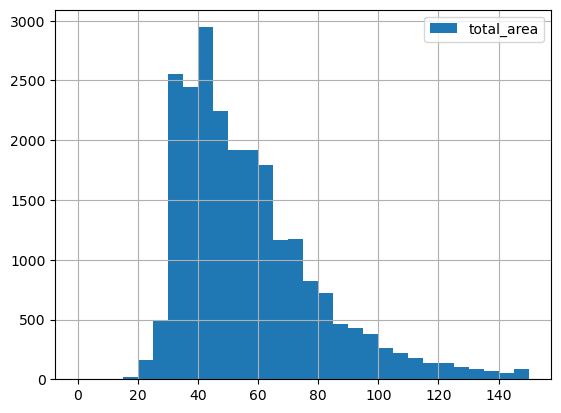

In [79]:
good_data['total_area'].hist(bins=30, range=(0,150),legend='total_area')
plt.show()

В наборе данных преобладают объекты общей площадью 35-45 кв.м.

**Данные по жилой площади:**

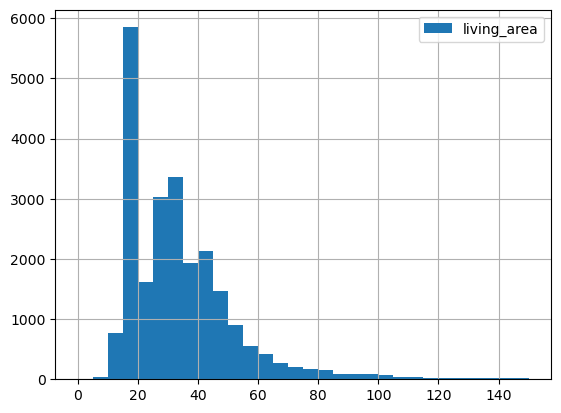

In [80]:
good_data['living_area'].hist(bins=30, range=(0,150),legend='living_area')
plt.show()

Среди продаваемых объектов недвижимости больше всего объектов с жилой площадью 15-30 кв.м., но есть и объекты с жилой площадью менее 10 кв.м., а так же больше 80 кв.м.

**Данные по площади кухни:**

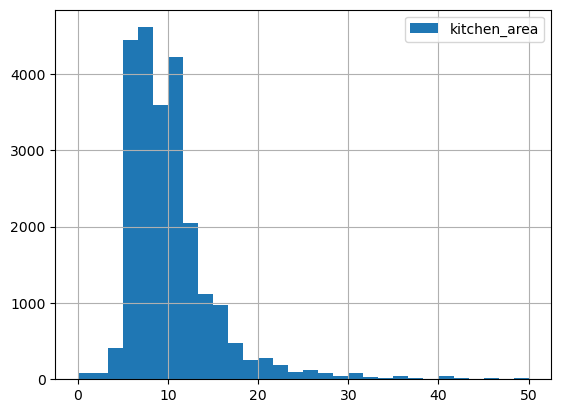

In [81]:
good_data['kitchen_area'].hist(bins=30, range=(0,50),legend='kitchen_area')
plt.show()

Наиболее часто встречаемая площадь кухонь 5-12 кв. м. (чаще всего около 8), при этом присутствуют кухни с площадью менее 5 кв.м и более 40.

**Данные по цене объекта:**

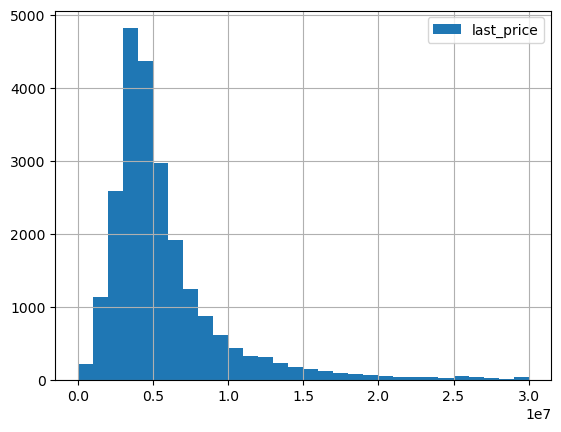

In [82]:
good_data['last_price'].hist(bins=30, range=(0,3e7), legend='last_price')
plt.show()

Наиболее частая цена объекта 3-5 млн.руб.

**Данные по количеству комнат:**

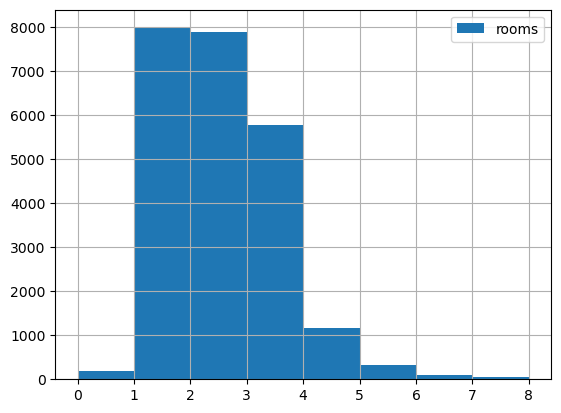

In [83]:
good_data['rooms'].hist(bins=8, range=(0,8),legend='rooms')
plt.show()

Больше всего проедается квартир с количеством комнат 1 и 2, в целом соответствует рынку недвижимости.

**Данные по высоте потолков:**

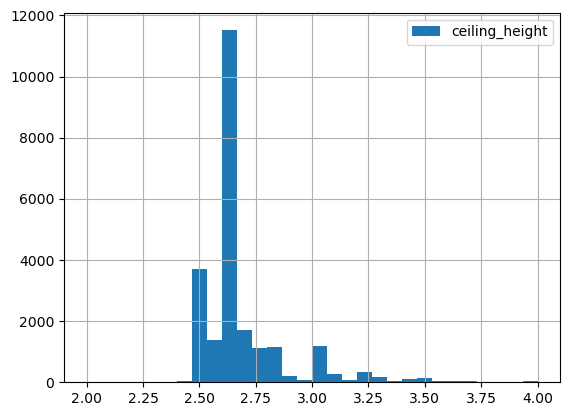

In [84]:
good_data['ceiling_height'].hist(bins=30, range=(2,4),legend='ceiling_height')
plt.show()

Наиболее часто встречающаяся высота потолков 2,5 и 2,6 м что соответствуем двум самым популярным классам объектом недвижимости.

**Данные по этажу квартиры:**

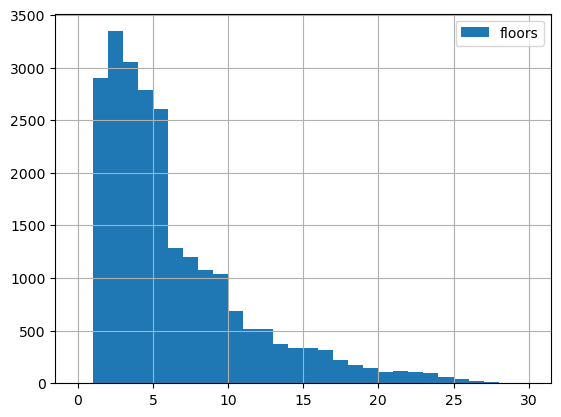

In [85]:
good_data['floors'].hist(bins=30, range=(0,30),legend='floor')
plt.show()

Судя по гистограмме, чаще всего продавались объекты высотой до 6 этажа.

**Данные по типу этажа квартиры:**

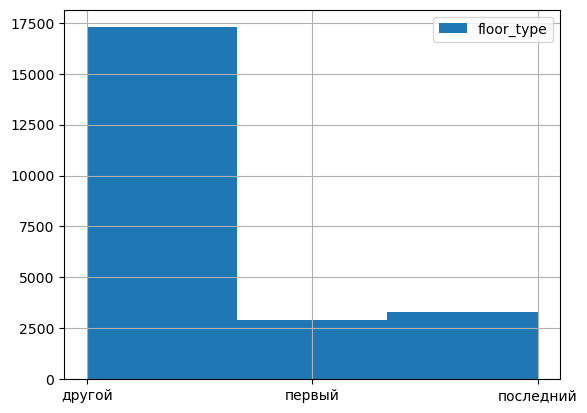

In [86]:
good_data['floor_type'].hist(bins=3,legend='floor_type')
plt.show()

Большая часть продаваемых квартир расположена ни на первых ни на последних этажах, первые и последние этаже продаются реже. Конечно, надо учитывать то, что количество продаваемых квартир на первых и последних этажах в принципе меньше. Вполне можно понять почему на этих этажах реже покупают квартиры. На первых этажах ваши окна у всех на виду и весь мусор, который спускают в канализацию в вашем подъезде, проходит через вашу квартиру. А на последнем другие проблемы, например, протечки крыши, а так же сложности вроде "дождаться лифта".

**Данные по общему количеству этажей в доме:**

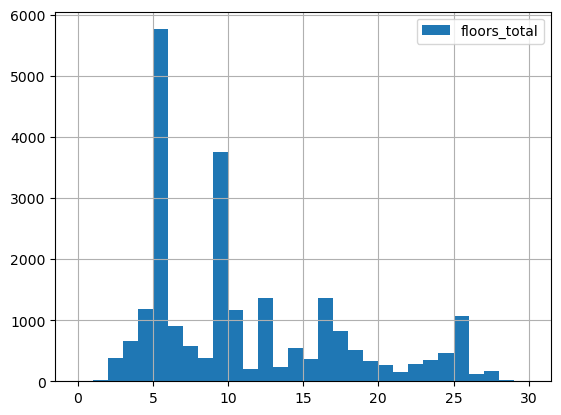

In [87]:
good_data['floors_total'].hist(bins=30,range=(0,30),legend='floors_total')
plt.show()

Наибольшее число квартир продавалось в 5-этажных домах и 9-этажных.

**Данные по расстоянию до центра города в метрах:**

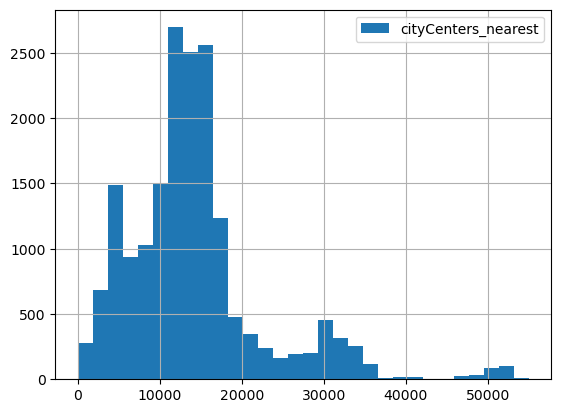

In [88]:
good_data['cityCenters_nearest'].hist(bins=30, range=(0,55000), legend='cityCenters_nearest')
plt.show()

Чаще всего продавались объекты, удаленные от центра на 12-16 км.

**Данные по расстоянию до ближайшего аэропорта:**

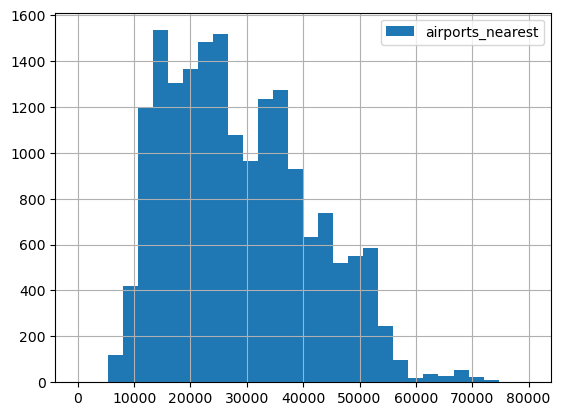

In [89]:
good_data['airports_nearest'].hist(bins=30, range=(0,80000), legend='airports_nearest')
plt.show()

Удаленность объектов недвижимости от аэропортов сильно разбросана, но все же преобладают объекты с расстоянием до аэропорта 12-24 км.

**Данные по расстоянию до ближайшего парка:**

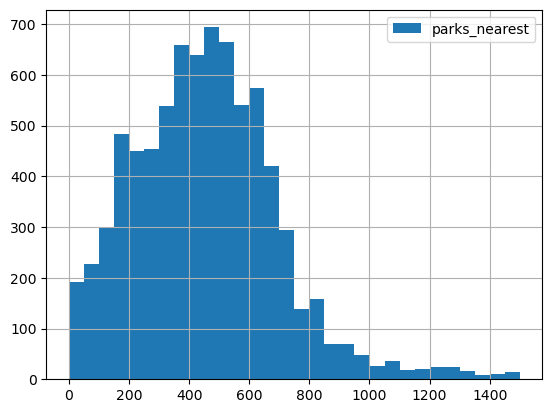

In [90]:
good_data['parks_nearest'].hist(bins=30, range=(0,1500),legend='parks_nearest')
plt.show()

Самое частое расстояние до парка среди продаваемых объектов составляет 500 м.

**Данные по дню публикации объявлений:**

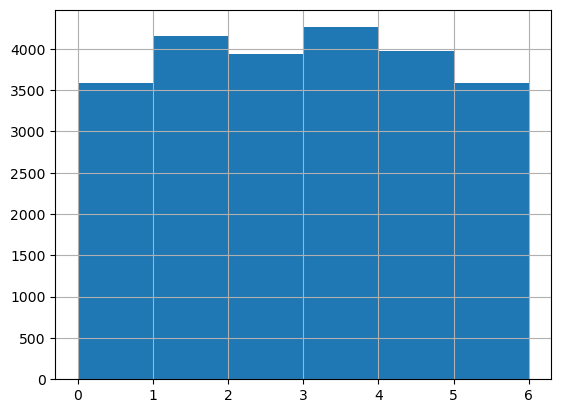

In [91]:
good_data['exposition_weekday'].hist(bins=6)
plt.show()

Так как это категориальная переменная, вместо гистограммы начертим столбчатую диаграмму:

<Axes: xlabel='exposition_weekday'>

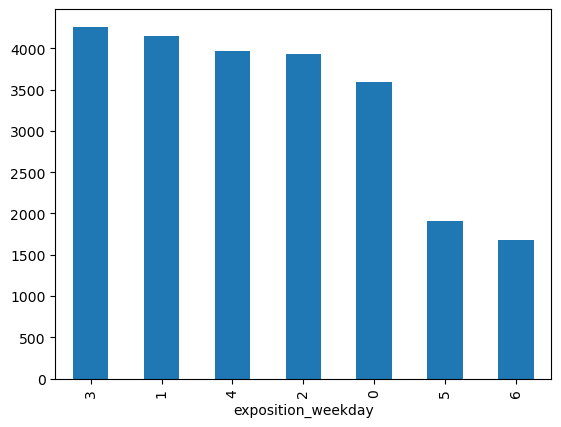

In [92]:
good_data['exposition_weekday'].value_counts().plot.bar()

В целом размещение объявлений по дням недели происходило примерно равномерно с небольшим преобладанием в четверг.

**Данные по месяцу публикации объявлений:**

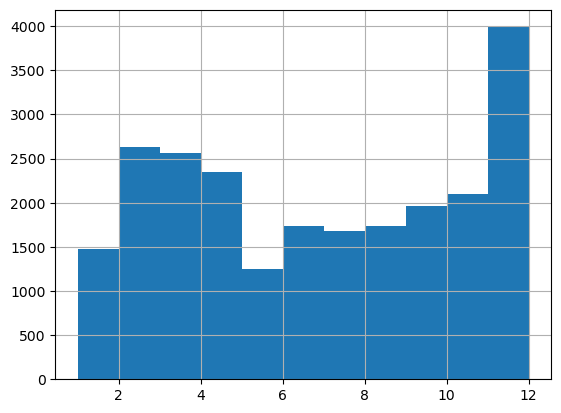

In [93]:
good_data['exposition_month'].hist(bins=11)
plt.show()

Больше всего объявления о продаже опубликованов последний месяц года.

### **Вывод о наиболее продаваемом объекте недвижимости:**

Проанализоровав данные таблицы, сделала вывод о наиболее продаваемом объекте недвижимости: это 1-2 комнатная квартира на 2-м этаже 5-этажного дома общей площадью около 45 кв.м. с жилой площадью 15-20 кв.м. и площадью кухни около 8 кв.м., стоимостью 3,5-5 млн.руб. и высотой потолков 2,6 м., удаленная от центра на 12-16 км., от парка на 450 м и от аэропорта на 12-14 км. В конце года происходил резкий рост количества объявления о продаже.

**Анализ скорости продажи квартир**

Построим гистограмму по данным столбца days_exposition, показывающего сколько дней было размещено объявление:

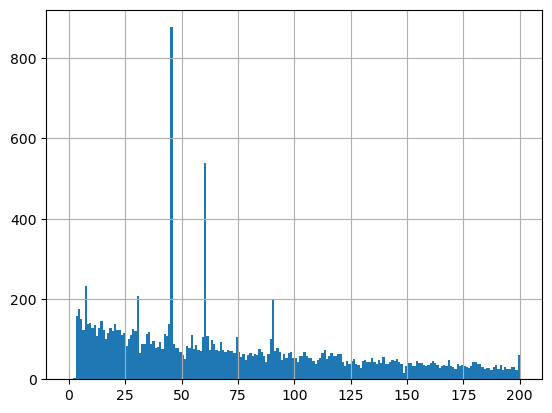

In [94]:
good_data['days_exposition'].hist(bins=200, range=(0, 200))
plt.show()

На диаграмме обнаружились аномалии, найдем их значения:

In [95]:
good_data['days_exposition'].value_counts().head(10)

days_exposition
45.0    877
60.0    538
7.0     233
30.0    208
90.0    199
4.0     174
3.0     157
5.0     151
14.0    144
9.0     141
Name: count, dtype: int64

Судя по полученным данным, чаще всего объекты продавались на 45-й и 60-й день после подачи объявлений.

Посчитаем среднее и медиану по данным столбца days_exposition:

In [96]:
good_data['days_exposition'].describe()

count   20332.0
mean      180.6
std       219.6
min         1.0
25%        45.0
50%        95.0
75%       231.0
max      1580.0
Name: days_exposition, dtype: float64

Среднее время продажи квартиры составляет 180 дней. Медианное значение составляет 95 дней, что сильно отличается от среднего, такие продажи можно назвать быстрыми. Чаще всего объекты продавались на 45-й и 60-й день после подачи объявлений. При этом в наборе данных присутствуют необычно долгие продажи в течение 4-х лет и более.

Для более детальной оценки скорости продажи можно оценить ее в зависмости от других факторов, например, от месяца подачи объявления:

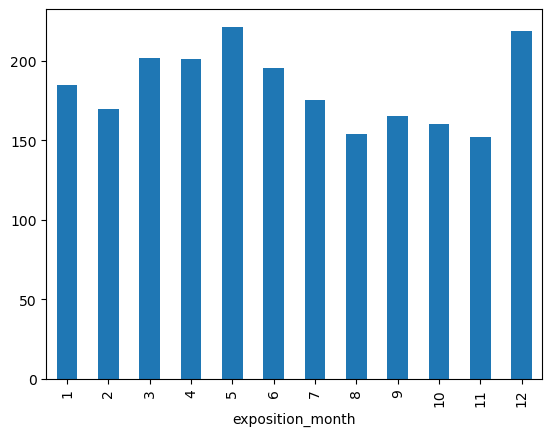

In [97]:
good_data.groupby('exposition_month')['days_exposition'].mean().plot.bar()
plt.show()

Таким образом мы обнаружили, что быстрее всего продавались квартиры, размещенные в объявлениях в ноябре, а медленнее всего - размещенные в мае и декабре.

**Изучим факторы, влияющие на общую стоимость объекта**

Проанализируем зависимость цены от общей площади объекта:

Построим диаграмму рассеяния:

<Axes: xlabel='total_area', ylabel='last_price'>

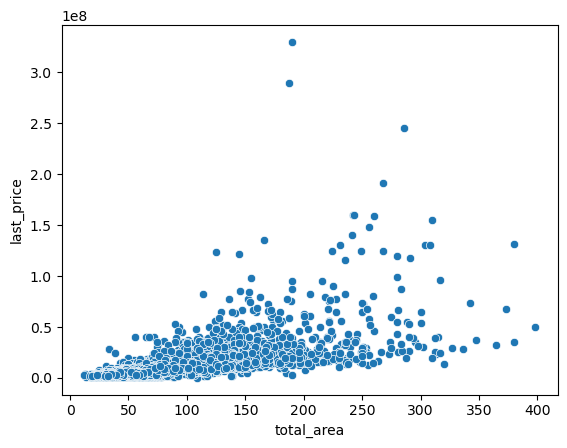

In [98]:
seaborn.scatterplot(x='total_area', y='last_price', data=good_data)

Построим диаграмму рассеяния с линией регрессии:

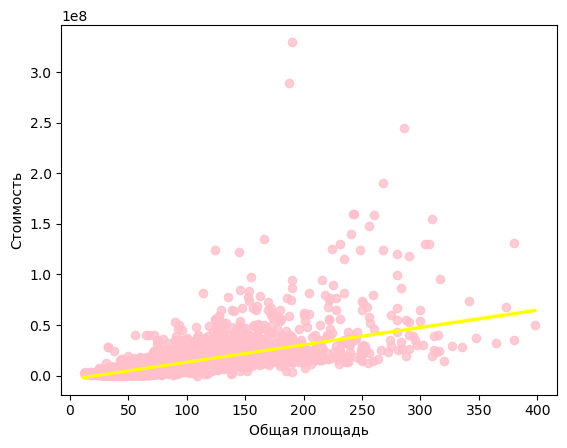

In [99]:
seaborn.regplot(
    x='total_area', 
    y='last_price', 
    data=good_data, scatter_kws={"color": "pink"}, line_kws={"color": "yellow"})
plt.xlabel(
    'Общая площадь')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что с ростом общей площади растет и цена, при этом также увеличивается разброс цен на объекты одинаковой площади.

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [100]:
round(good_data['total_area'].corr(good_data['last_price']), 2)

0.68

**Проанализируем зависимость цены от жилой площади объекта:**

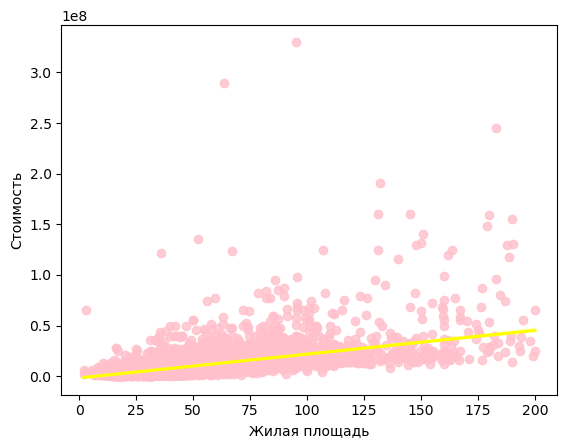

In [101]:
seaborn.regplot(
    x='living_area', 
    y='last_price', 
    data=good_data, scatter_kws={"color": "pink"}, line_kws={"color": "yellow"})
plt.xlabel(
    'Жилая площадь')
plt.ylabel(
    'Стоимость')
plt.show()

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [102]:
round(good_data['living_area'].corr(good_data['last_price']), 2)

0.6

Из диаграммы видно, что с ростом жилой площади растет и цена, при этом также увеличивается разброс цен на объекты с одинаковой жилой площадью. Однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади.

**Проанализируем зависимость цены от площади кухни объекта:**

Построим диаграмму рассеяния с линией регрессии:

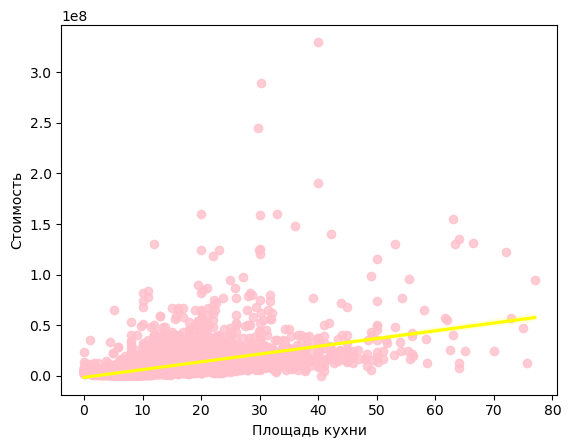

In [103]:
seaborn.regplot(
    x='kitchen_area', 
    y='last_price', 
    data=good_data, scatter_kws={"color": "pink"}, line_kws={"color": "yellow"})
plt.xlabel(
    'Площадь кухни')
plt.ylabel(
    'Стоимость')
plt.show()

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [104]:
round(good_data['kitchen_area'].corr(good_data['last_price']), 2)

0.54

Из диаграммы видно, что с ростом площади кухни растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади.

**Проанализируем зависимость цены от количества комнат объекта:**

Построим диаграмму рассеяния с линией регрессии:

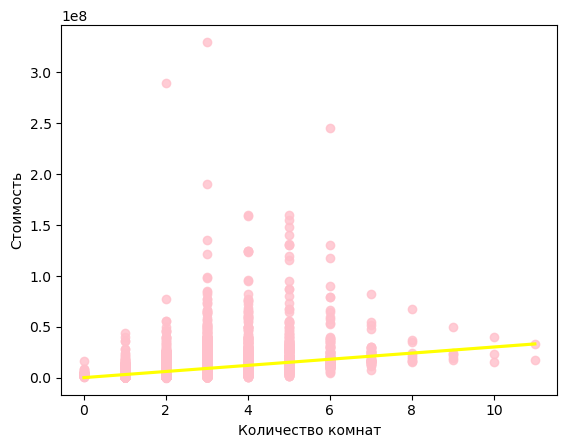

In [105]:
seaborn.regplot(
    x='rooms', 
    y='last_price', 
    data=good_data, scatter_kws={"color": "pink"}, line_kws={"color": "yellow"})
plt.xlabel(
    'Количество комнат')
plt.ylabel(
    'Стоимость')
plt.show()

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [106]:
round(good_data['rooms'].corr(good_data['last_price']), 2)

0.4

Из диаграммы видно, что с ростом количества комнат растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади. На объекты с количеством комнат равным 5 наблюдается наибольший разброс цен.

**Проанализируем зависимость цены от этажа, на котором расположена квартира (первый, последний, другой):**

Построим гистограмму:

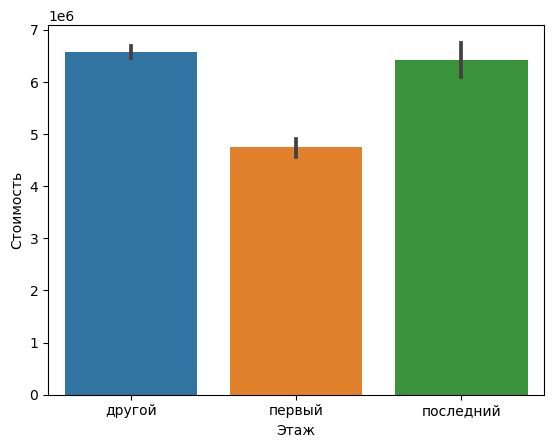

In [107]:
seaborn.barplot(
    x='floor_type', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'Этаж')
plt.ylabel(
    'Стоимость')
plt.show()

Из гистограммы видно, что самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся не на первом и не на последнем этаже.

**Проанализируем зависимость цены от дня недели размещения объявления:**

Построим гистограмму:

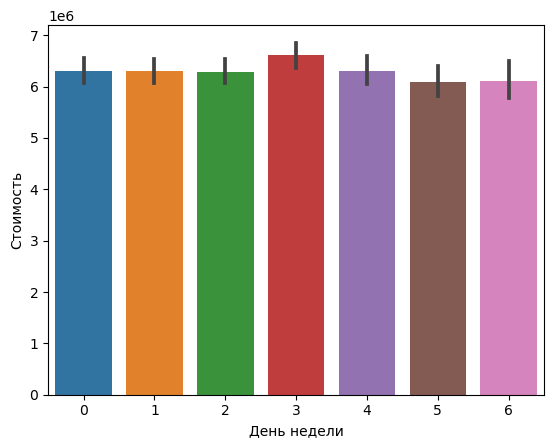

In [108]:
seaborn.barplot(
    x='exposition_weekday', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'День недели')
plt.ylabel(
    'Стоимость')
plt.show()

Для большей наглядности построим точечную диаграмму:

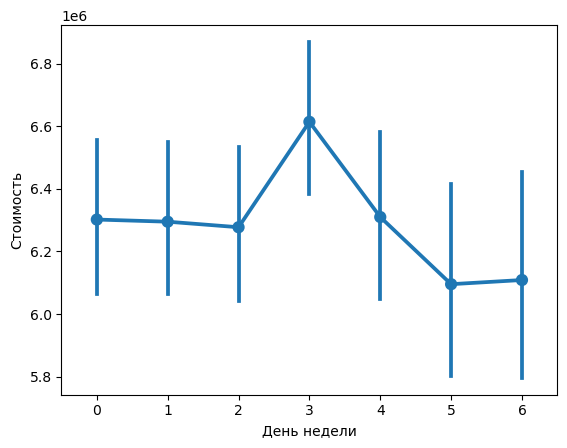

In [109]:
seaborn.pointplot(
    x='exposition_weekday', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'День недели')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что дороже всего продавались квартиры, размещенные в объявлениях по четвергам.

**Проанализируем зависимость цены от месца размещения объявления:**

Построим гистограмму:

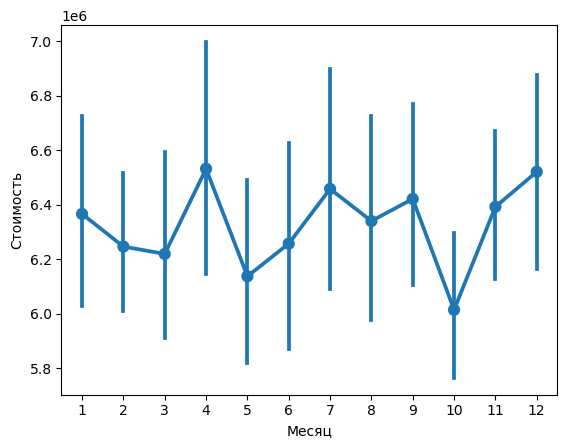

In [110]:
seaborn.pointplot(
    x='exposition_month', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'Месяц')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что дешевле всего продавались квартиры, размещенные в объявлениях в октябре, а дороже всего - размещенные в апреле и декабре.

**Проанализируем зависимость цены от года размещения объявления:**

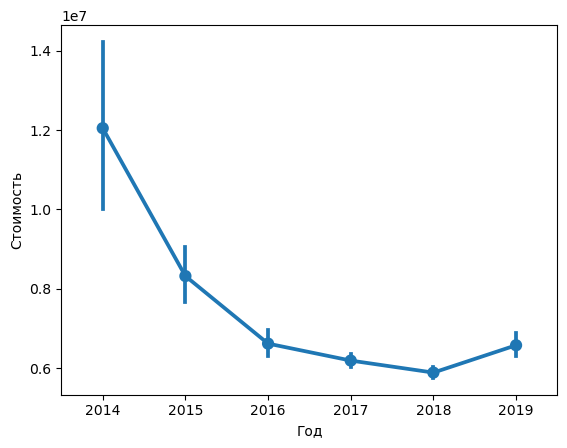

In [111]:
seaborn.pointplot(
    x='exposition_year', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что с 2014 года цены на квартиры падали, в 2018 году была самая низкая цена продаж, после чего цены вновь начали расти. Но на уменьшение стоимости квартир могло повлиять уменьшение их площади. Проверим это предположение, проанализировав зависимость площади и цены квадратного метра от года размещения объявления:

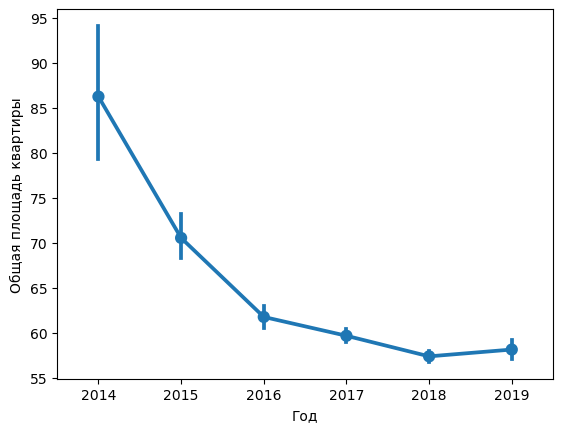

In [112]:
seaborn.pointplot(
    x='exposition_year', 
    y='total_area', 
    data=good_data)
plt.xlabel(
    'Год')
plt.ylabel(
    'Общая площадь квартиры')
plt.show()

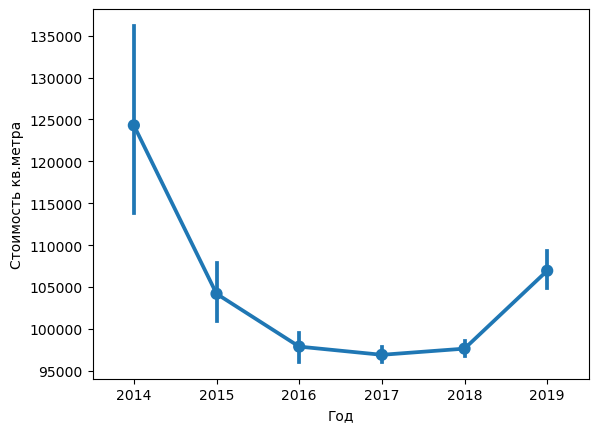

In [113]:
seaborn.pointplot(
    x='exposition_year', 
    y='price_for_meter', 
    data=good_data)
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость кв.метра')
plt.show()

### **Вывод о минимальной цене на кв.м. за последние года**

Действительно, в 2018 г были минимальные площади продаваемых квартир, что обусловило и минимальные цены на объекты недвижимости. Проверив динамику стоимости квадратного метра, обнаружили, что в 2017- 2018 гг стоимость квадратного метра стала минимальной, после чего, вероятно, стало невыгодно продавать квартиры с большой площадью, и площадь продаваемых объектов в 2018 году упала до минимума.

**Проанализируем цену одного квадратного метра**

Посчитаем медианную цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [114]:
median_prices = good_data.groupby('locality_name')['price_for_meter']\
                        .agg(['count','median'])\
                        .sort_values(by='count', ascending=False).head(10)
median_prices

,count,median
locality_name,,
Санкт-Петербург,15588,104755.9
Мурино,586,86250.4
Кудрово,469,95588.2
Шушары,439,76829.3
Всеволожск,397,65789.5
Пушкин,368,99993.6
Колпино,338,74723.7
Парголово,327,91642.9
Гатчина,307,67796.6


Населенный пункт с минимальной стоимостью квадратного метра (среди 10-ти н.п. с наибольшим количеством объявлений):

In [115]:
median_prices[median_prices['median'] == median_prices['median'].min()]

,count,median
locality_name,,
Выборг,235,58307.7


Населенный пункт с максимальной стоимостью квадратного метра (среди 10-ти н.п. с наибольшим количеством объявлений):

In [116]:
median_prices[median_prices['median'] == median_prices['median'].max()]

,count,median
locality_name,,
Санкт-Петербург,15588,104755.9


Выделим цветом максимальную и минимальную стоимости квадратного метра среди 10 населенных пунктов с наибольшим количесвом объявлений, построив температурный график (синий - минимальный, красный - максимальный):

In [117]:
pd.DataFrame(median_prices['median'].to_frame(name='Цена кв.м.')).style.background_gradient('coolwarm')

,Цена кв.м.
locality_name,
Санкт-Петербург,104755.950000
Мурино,86250.375000
Кудрово,95588.240000
Шушары,76829.270000
Всеволожск,65789.470000
Пушкин,99993.590000
Колпино,74723.745000
Парголово,91642.860000
Гатчина,67796.610000


### **Вывод о максимальной стоимости кв. м.**:
Среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Выборге.

**Проанализируем стоимость объектов в зависимости от расстояния до центра в километрах:**

In [118]:
prices_km_to_center = good_data.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='km_to_city_center', values='price_for_meter')
prices_km_to_center

,price_for_meter
km_to_city_center,
0.0,245833.5
1.0,177103.2
2.0,155362.3
3.0,121058.2
4.0,130266.3
5.0,138927.1
6.0,147940.3
7.0,155687.1
8.0,124340.9


Построим соответствующий график:

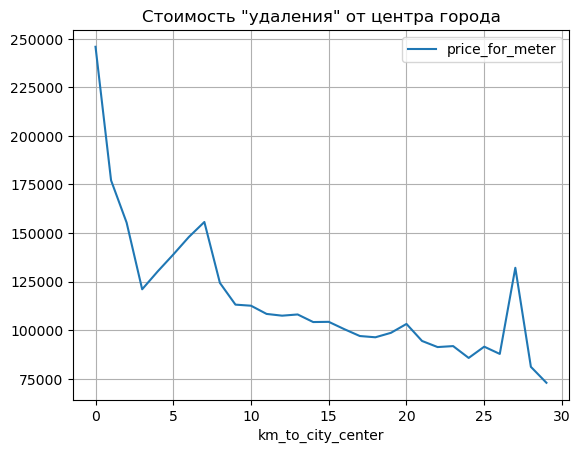

In [119]:
prices_km_to_center.plot(grid=True, title = 'Cтоимость "удаления" от центра города')
plt.show()

### **Вывод о зависимости от центра**
В целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 7 км и 27 км от центра наблюдается рост цен квадратного метра, это может быть связано с нахождением там КАД или элитных жилых районов.

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 23565 non-null  int64         
 1   last_price                   23565 non-null  int32         
 2   total_area                   23565 non-null  float64       
 3   first_day_exposition         23565 non-null  datetime64[ns]
 4   rooms                        23565 non-null  int64         
 5   ceiling_height               14481 non-null  float64       
 6   floors_total                 23565 non-null  int32         
 7   living_area                  23565 non-null  float64       
 8   floor                        23565 non-null  int64         
 9   is_apartment                 23565 non-null  bool          
 10  studio                       23565 non-null  bool          
 11  open_plan                    23565 non-null  b

## Напишите общий вывод

Для исследования объявлений о продаже квартир были проанализированны данные сервиса "Яндекс. Недвижимость". Архив состоит из объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов.

До предобработки данных объем данных составлял 23699 строк, после обработки он сократился до 23565 строк. 

В процессе обработки обнаружили наибольшее количество пропусков в столбце is_apartment. Проанализировав строки с пропусками, сделали следующие предположения: пропуски в столбце is_apartment, вероятно, связаны с тем, что данные объекты недвижимости не являются апартаментами, такие пропуски заменили на False. Пропуски в графе balcony, вероятно, связаны с тем, что в данных объектах недвижимости нет балконов, их заменили нулями. Пропуски в графе «Жилая площадь» заполнили произведениями известных величин общей площади на коэффициенты долей жилой площади в общей в зависимости от количества комнат. Пропуски в графе «Площадь кухни» заполнили минимальными значениями из двух рассчитанных площадей кухонь (рассчитанной из условия, что сумма площади кухни и жилой площади не должна превышать 0,9 от общей площади и рассчитанной как известных величин общей площади на коэффициент доли площади кухни в общей площади. Пропуски высоты потолков заполнили медианным значением. Пропуски в графах «Название н.п.» и «Общее кол-во этажей» отбросили, т.к. они составляли малую долю в общих данных. Далее изменили типы данных в столбцах first_day_exposition, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition  - для удобства последующего анализа. Далее выполнили поиск дубликатов и заменили разные написания названий одних и тех же населенных пунктов - на единые. Проанализировав редкие и выбивающиеся значения отбросили данные о квартирах стоимостью более 100 млн общей площадью более 400 кв.м. с числом комнат более 10, высотой потолков более 6 м. и менее 2 м, располагающиеся выше 25 этажа, в домах высотой более 40 этажей, с жилой площадью более 200 кв.м. И площадью кухни более 80 кв.м.
Затем посчитали и добавили в таблицу данные о стоимости одного квадратного метра, дне недели, месяце и годе публикации объявления, типе этажа квартиры и расстоянии до центра города в км.

Далее провели исследовательский анализ данных:
1. Изучив параметры объектов недвижимости, сделали вывод о наиболее продаваемом объекте недвижимости: это 1-2 комнатная квартира на 2-м этаже 5-этажного дома общей площадью 40-45 кв.м. с жилой площадью 15-20 кв.м. и площадью кухни около 8 кв.м., стоимостью 3,5-5 млн.руб. и высотой потолков 2,6 м., удаленная от центра на 12-16 км., от парка на 450 м и от аэропорта на 12-14 км. В конце года происходил резкий рост количества объявления о продаже.
2. Проведя анализ скорости продажи квартир, обнаружили, что среднее время продажи квартиры составляет 180 дней. Медианное значение составляет 95 дней, что сильно отличается от среднего. Чаще всего объекты продавались на 45-й и 60-й день после подачи объявлений. При этом в наборе данных присутствуют необычно долгие продажи в течение 4-х лет и более. Также обнаружили, что быстрее всего продавались квартиры, размещенные в объявлениях в ноябре, а медленнее всего - размещенные в мае.
3. Изучив факторы, влияющие на стоимость объекта, выяснили что больше всего на стоимость влияет полная площадь объектов. При этом самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся ни на первом, ни на последнем этаже. Также дороже всего продавались квартиры, размещенные в объявлениях по четвергам в апреле и декабре, а дешевле всего - в октябре. Кроме того выяснили, что Из диаграммы видно, что с 2014 года цены на квартиры падали, в 2018 году была самая низкая цена продаж, после чего цены вновь начали расти. Но падение стоимости квартир было обусловлено тем, что в 2018 г. были минимальные площади продаваемых объектов. Проверив динамику стоимости квадратного метра, обнаружили, что в 2017- 2018 гг стоимость квадратного метра стала минимальной, после чего, вероятно, стало невыгодно продавать квартиры с большой площадью, и площадь продаваемых объектов в 2018 году упала до минимума.
4. Проанализировав цену одного квадратного метра, выяснили, что среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Выборге.
5. Проанализировав стоимость объектов в зависимости от расстояния до центра в километрах убедились, что в целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 7 км и 27 км от центра наблюдается рост цен квадратного метра, это может быть связано с нахождением там КАД или элитных жилых районов.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.